In [1]:
!pip install kaggle --upgrade
print ("writing kaggle")
!echo "{\"username\":\"benjykatz\",\"key\":\"572fb2bc0eb7cb591fc708326d55de5d\"}" > kaggle.json
!sudo mkdir -p ~/.kaggle
!sudo cp /content/kaggle.json ~/.kaggle/kaggle.json
print ("got kaggle json copied")
!chmod 600 /root/.kaggle/kaggle.json
!kaggle --version
#!kaggle datasets download -d arashnic/hr-analytics-job-change-of-data-scientists
!kaggle competitions download -c ieee-fraud-detection

writing kaggle
got kaggle json copied
Kaggle API 1.5.16
 89% 105M/118M [00:01<00:00, 119MB/s]  
100% 118M/118M [00:01<00:00, 97.6MB/s]


In [2]:
#Unzip the data
!unzip ieee-fraud-detection.zip

Archive:  ieee-fraud-detection.zip
  inflating: sample_submission.csv   
  inflating: test_identity.csv       
  inflating: test_transaction.csv    
  inflating: train_identity.csv      
  inflating: train_transaction.csv   


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('train_transaction.csv')

In [5]:
X = df
y = df['isFraud']

# Split the data into a training set (usually 70-80%) and a testing set (usually 20-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
is_fraud = X_train[X_train['isFraud']==1]
not_fraud = X_train[X_train['isFraud']==0]

Text(0, 0.5, 'frequency')

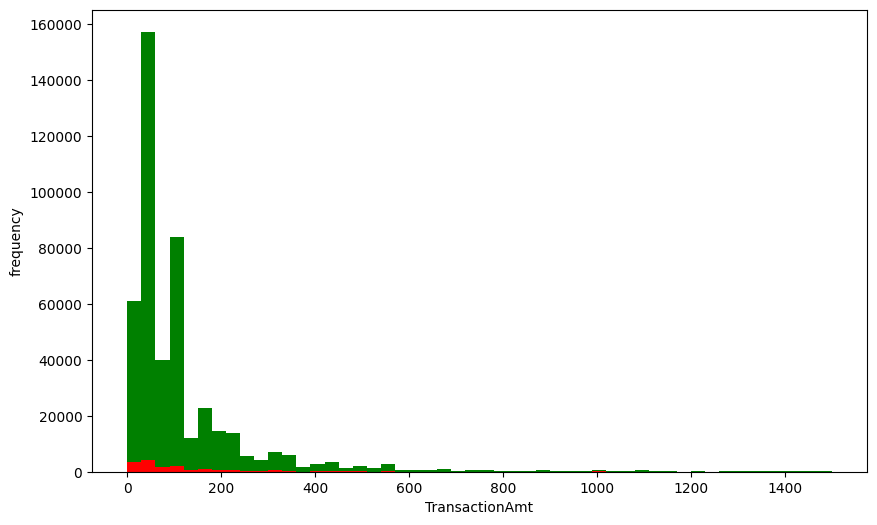

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

plt.hist(not_fraud['TransactionAmt'], bins = 50, label = 'not fraud', stacked = True, color = 'green', range= (0, 1500))
plt.hist(is_fraud['TransactionAmt'], bins = 50, label = 'fraud', stacked = True, color = 'red', range= (0, 1500))
plt.xlabel('TransactionAmt')
plt.ylabel('frequency')